#### 2020년 이후꺼를 보자 (텐서2)
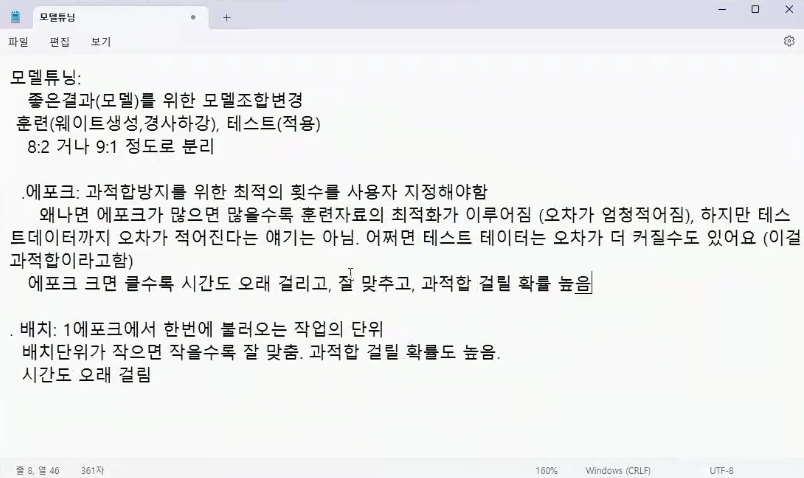
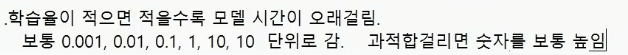

### 티쳐블 머신으로 가위바위보 학습시켜서 모델 가져와 실행해보자
- 창을 끄고 진행해야함(인터넷) 웹캠 겹침

In [4]:
from keras.models import load_model
import cv2
import numpy as np 
model=load_model(r'C:\Users\USER\Desktop\SESAC\WEB\24.01-22\3. 인공지능모델과 연결_오픈CV\01. openCV에서 얼굴인식 및 모델연결\keras_model.h5',compile=False)
model.get_weights()

[array([[[[ 5.36193103e-02, -2.89290641e-02, -1.61487445e-01,
           -4.31152587e-21,  1.85963452e-01,  8.19552328e-23,
            9.80914459e-02,  3.78937426e-22, -4.22908962e-02,
           -1.39291406e-01, -4.40711491e-02,  1.61554725e-21,
           -1.74370021e-01,  3.27558474e-22, -6.13687262e-02,
            3.37053463e-02],
          [ 1.09852038e-01,  5.88377891e-03, -2.79647171e-01,
           -1.03351306e-19,  4.13371861e-01, -3.50681716e-22,
           -3.04018036e-02, -3.65447400e-22, -5.42619862e-02,
            2.41658017e-01,  1.57488555e-01, -1.71896300e-22,
           -3.07682067e-01,  1.77166686e-22, -1.08045608e-01,
            8.84636194e-02],
          [ 3.31523493e-02, -7.77270198e-02, -7.09995553e-02,
           -5.21279076e-20,  1.05326571e-01, -4.06604482e-22,
           -8.29352289e-02, -9.54498787e-23, -8.77229124e-03,
            3.97338457e-02, -1.09442413e-01,  5.23086270e-22,
           -9.97327194e-02, -8.73464596e-23, -2.81645870e-03,
            

In [10]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("rosipa.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# CAMERA can be 0 or 1 based on default camera of your computer
camera = cv2.VideoCapture(0)

while True:
    # Grab the webcamera's image.
    ret, image = camera.read()

    # Resize the raw image into (224-height,224-width) pixels
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

    # Show the image in a window
    cv2.imshow("Webcam Image", image)

    # Make the image a numpy array and reshape it to the models input shape.
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

    # Normalize the image array
    image = (image / 127.5) - 1 # 정규화 과정

    # Predicts the model
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

    # Listen to the keyboard for presses.
    keyboard_input = cv2.waitKey(1)

    # 27 is the ASCII for the esc key on your keyboard.
    if keyboard_input == 27:
        break

camera.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 458ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 22ms/step
Class: 바위
Confidence Score: 99 %
1/1 [==============================] - 0s 25ms/step
Class: 바위
Confidence Score: 99 %
1/1 [==============================] - 0s 21ms/step
Class: 바위
Confidence Score: 99 %
1/1 [==============================] - 0s 24ms/step
Class: 바위
Confidence Score: 99 %
1/1 [==============================] - 0s 22ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 23ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 21ms/step
Class: 바위
Confidence Score: 99 %
1/1 [==============================] - 0s 24ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 23ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 21ms/step
Class: 바위
Confidence Score: 98 %
1/1 [==============================] - 0s 26ms/step
Class: 바위
Co

In [14]:
classN=['ㅁ','ㄱ','ㅇ'] # 약간 이런식이다.(티처블에서 만든 레이블 이름) 
model_pred=[0.3,0.2,0.5] # 각 확률값 (웹캠화면에서 받아들인 사진을 모델에서 인식한 각 값의 확률) ㅁ-0.3,ㄱ-0.2,ㅇ-0.5 (예시임)
a=np.argmax(model_pred) # 가장 높은자리의 인덱스(가장 높은 확률값의 위치)
classN[a]  # 그 레이블을 출력

#ㅁ은 [1,0,0]으로 학습
#ㄱ은 [0,1,0]
#ㅇ은 [0,0,1]로 학습하는 원핫인코딩 기법을 진행함

'ㅇ'

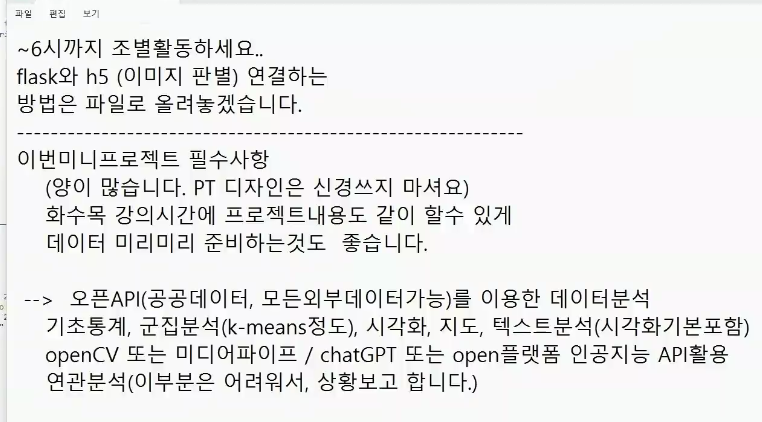